In [1]:
#Importing the necessary libraries

from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

#Importing the data and checking the shapes
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('Training image shape (number, length, width, channel):', x_train.shape)
print('Testing image shape (number, length, width, channel):', x_test.shape)
print('Number of training labels:', y_train.shape)
print('Number of testing labels:', y_test.shape)

Training image shape (number, length, width, channel): (50000, 32, 32, 3)
Testing image shape (number, length, width, channel): (10000, 32, 32, 3)
Number of training labels: (50000, 1)
Number of testing labels: (10000, 1)


In [2]:
#Defining a list of labels to use later to match prediction integers with their labels

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
#The label arrays for training and testing must be converted using to_categorical() to train the model
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#The data was imported as RGB grids of pixels. Each pixel value will be normalized to a value from 0 to 1.
x_train = x_train / 255 
x_test = x_test / 255

In [4]:
#Building the convnet to classify the CIFAR dataset
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [5]:
#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [6]:
#Compiling the model with the categorical_crossentropy loss function, the RMSprop optimizer, and accuracy as the metric
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
#Fitting the model
history = model.fit(x_train, y_train, epochs = 40, batch_size = 500, verbose = 0)

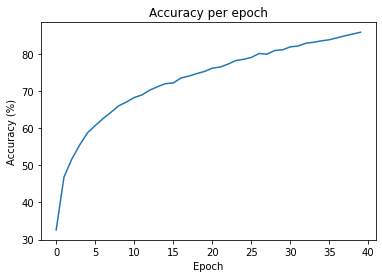

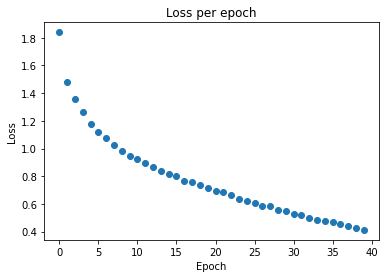

In [8]:
import matplotlib.pyplot as plt

#Plotting the accuracy and loss per epoch
plt.plot(range(len(history.history['accuracy'])), [x * 100 for x in history.history['accuracy']])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per epoch')
plt.show()

plt.scatter(range(len(history.history['loss'])), history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per epoch')
plt.show()

In [9]:
#Saving the model
model.save('cnn.h5')

In [18]:
#The model will be tested on a random image and the prediction will be output

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

#Function to load the image
def load_image(filename):
    image = load_img(filename, target_size = (32, 32))
    image = img_to_array(image)
    image = image.reshape(1, 32, 32, 3)
    image = image.astype('float32')
    image = image / 255.0
    return image
 
#Fucntion to predict the class of the image
def run_model():
    image = load_image('bird.png')
    model = load_model('cnn.h5')
    result = model.predict_classes(image)
    print(result[0]) 


In [24]:
run_model()
#The output is 2, or bird, which is what the input image is. This result was returned even after 
#multiple runs of the classifier were conducted. The classifier works!

2
